# Predicción de Obesidad

## Obtencion de los datos

Los datos están contenidos en el fichero `bmi.csv`.

Importamos Numpy, Panda, Matplotlib y Seaborn

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
file_path = './bmi.csv'
bmidata = pd.read_csv(file_path)

In [57]:
bmidata.describe()

,Age,Height,Weight,Bmi
count,741.00,741.00,741.00,741.00
mean,31.62,1.71,78.41,26.37
std,11.66,0.09,32.25,9.22
min,15.00,1.46,25.90,12.15
25%,22.00,1.67,63.00,22.13
50%,29.00,1.72,72.90,24.13
75%,40.00,1.75,83.30,27.25
max,61.00,2.07,270.00,66.30


## Muestras generales del dataset.

In [58]:
bmidata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       741 non-null    int64  
 1   Height    741 non-null    float64
 2   Weight    741 non-null    float64
 3   Bmi       741 non-null    float64
 4   BmiClass  741 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 29.1+ KB


In [59]:
bmidata["BmiClass"].unique()

array(['Obese Class 1', 'Overweight', 'Underweight', 'Obese Class 2',
       'Obese Class 3', 'Normal Weight'], dtype=object)

In [60]:
bmidata["BmiClass"].replace(['Normal Weight', 'Obese Class 2', 'Underweight', 'Obese Class 3',
       'Overweight', 'Obese Class 1'], [1., 4., 0., 5., 2., 3.],inplace=True)
bmidata

,Age,Height,Weight,Bmi,BmiClass
0,61,1.85,109.30,31.94,3.00
1,60,1.71,79.02,27.02,2.00
2,60,1.55,74.70,31.09,3.00
3,60,1.46,35.90,16.84,0.00
4,60,1.58,97.10,38.90,4.00
...,...,...,...,...,...
736,34,1.86,95.70,27.66,2.00
737,44,1.91,106.90,29.30,2.00
738,25,1.82,88.40,26.69,2.00
739,35,1.88,98.50,27.87,2.00


### Un gráfico de cada uno de los atributos.

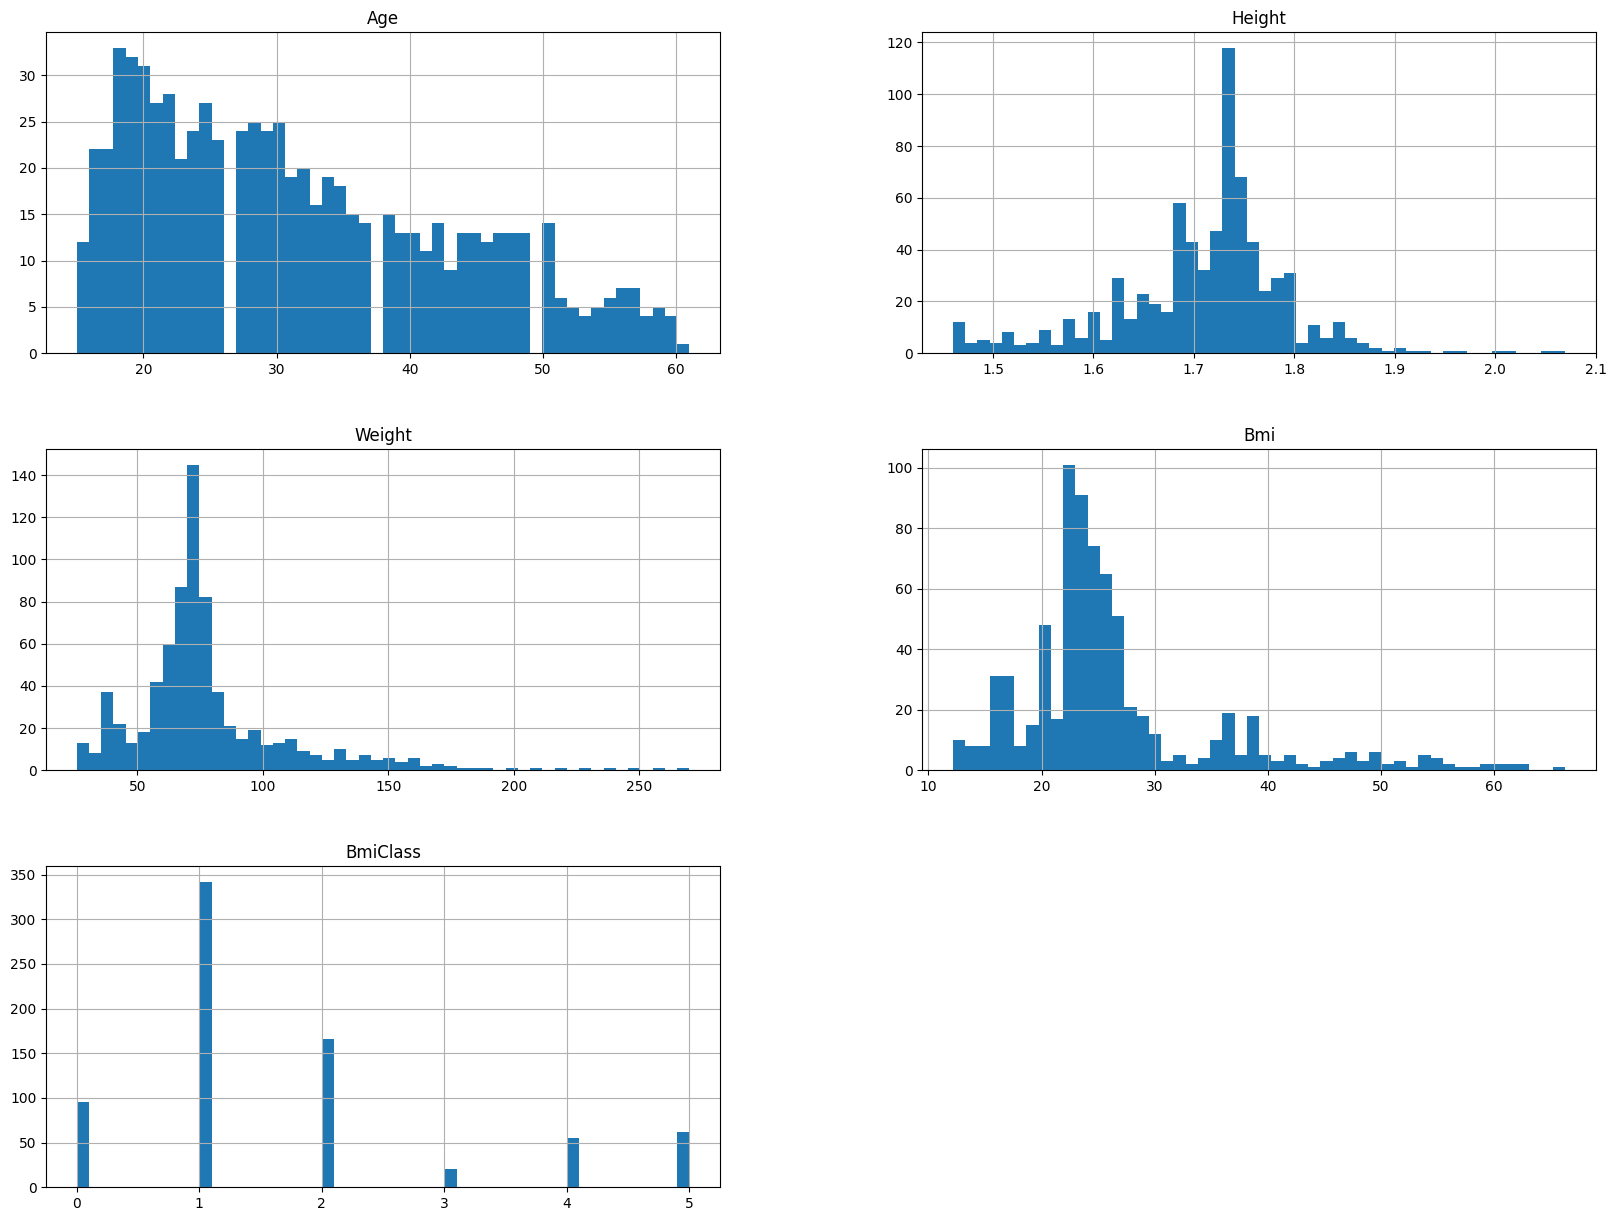

In [61]:
#Un gráfico de cada uno de los atributos.
bmidata.hist(bins=50 ,figsize=(20, 15))
plt.show()

In [62]:
# Matriz de correlaciones(vemos las correlaciones entre todos los atributos)
corr_matrix = bmidata.corr()
corr_matrix

,Age,Height,Weight,Bmi,BmiClass
Age,1.00,0.02,0.11,0.14,0.16
Height,0.02,1.00,0.61,0.43,0.40
Weight,0.11,0.61,1.00,0.97,0.90
Bmi,0.14,0.43,0.97,1.00,0.95
BmiClass,0.16,0.40,0.90,0.95,1.00


In [63]:
# Relación de cada uno de los atributos con la edad de los empleados(Un ejemplo)

corr_matrix["Age"].sort_values(ascending=False)

Age        1.00
BmiClass   0.16
Bmi        0.14
Weight     0.11
Height     0.02
Name: Age, dtype: float64

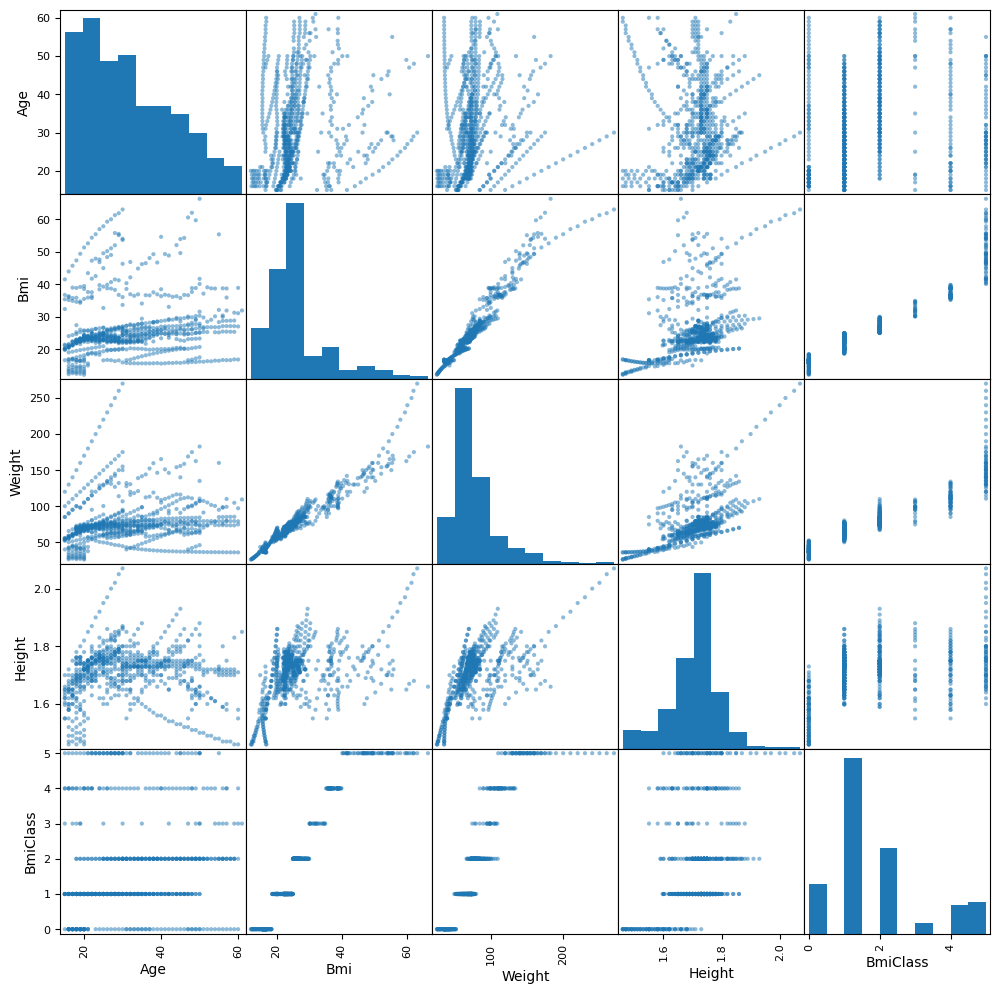

In [64]:
# Gráfico de correlaciones de 5 atributos importantes

from pandas.plotting import scatter_matrix

attributes = ["Age","Bmi","Weight","Height","BmiClass"]
pd.plotting.scatter_matrix(bmidata[attributes], figsize=(12,12))
plt.show()

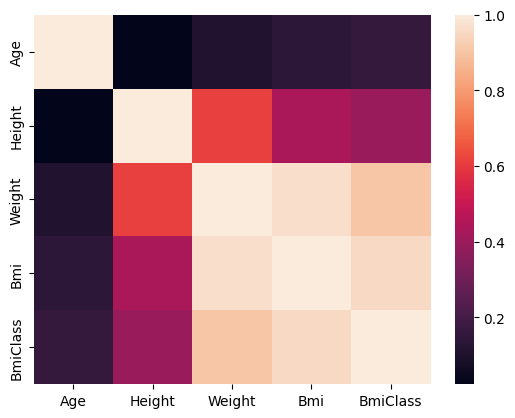

In [65]:
sns.heatmap(corr_matrix)
plt.show()

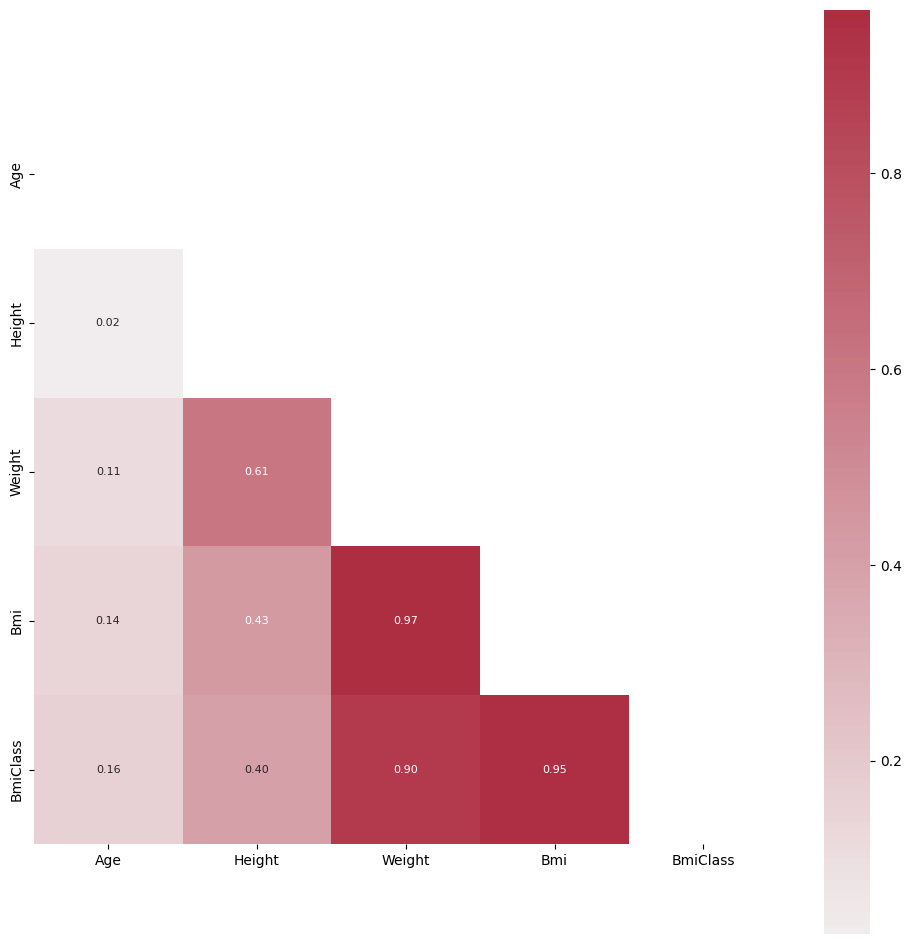

In [66]:
# Igual pero más intuitivo

# Crea una máscara
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Crea una paleta personalizada
cmap = sns.diverging_palette(100, 7, s=75, l=40, n=5, center="light", as_cmap=True)
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, mask=mask, center=0, annot=True, fmt='.2f', square=True, cmap=cmap, annot_kws={"size": 8})
plt.show()

## Combinaciones de atributos (featuring engineering)

In [67]:
bmidata

,Age,Height,Weight,Bmi,BmiClass
0,61,1.85,109.30,31.94,3.00
1,60,1.71,79.02,27.02,2.00
2,60,1.55,74.70,31.09,3.00
3,60,1.46,35.90,16.84,0.00
4,60,1.58,97.10,38.90,4.00
...,...,...,...,...,...
736,34,1.86,95.70,27.66,2.00
737,44,1.91,106.90,29.30,2.00
738,25,1.82,88.40,26.69,2.00
739,35,1.88,98.50,27.87,2.00


### Mezcla de datos

Antes de trocear el dataset, vamos a "barajarlo" para asegurarnos que no tenemos los datos agrupados por algún criterio

El método `sample()`extrae una muestra aleatoria del dataframe.

In [68]:
# extrae la mitad del dataframe de forma aleatoria

bmidata.sample(frac=0.5)

,Age,Height,Weight,Bmi,BmiClass
716,38,1.79,90.90,28.37,2.00
482,19,1.75,70.00,22.83,1.00
429,22,1.68,72.00,25.51,2.00
613,31,1.78,127.80,40.34,5.00
254,30,1.73,73.08,24.45,1.00
...,...,...,...,...,...
634,33,1.81,78.40,23.93,1.00
121,42,1.65,90.00,33.06,3.00
273,29,1.80,77.72,23.99,1.00
249,31,1.74,82.50,27.25,2.00


In [69]:
# extrae todo el dataframe de forma aleatoria

bmidata.sample(frac=1)

,Age,Height,Weight,Bmi,BmiClass
271,29,1.79,74.72,23.32,1.00
376,24,1.62,125.00,47.63,5.00
451,21,1.70,43.40,15.02,0.00
97,45,1.68,140.00,49.60,5.00
463,20,1.78,125.00,39.45,4.00
...,...,...,...,...,...
69,49,1.51,36.60,16.05,0.00
735,24,1.80,85.80,26.48,2.00
105,44,1.75,83.12,27.14,2.00
570,16,1.59,42.80,16.93,0.00


In [70]:
bmidata.head()

,Age,Height,Weight,Bmi,BmiClass
0,61,1.85,109.30,31.94,3.00
1,60,1.71,79.02,27.02,2.00
2,60,1.55,74.70,31.09,3.00
3,60,1.46,35.90,16.84,0.00
4,60,1.58,97.10,38.90,4.00


In [71]:
bmidata = bmidata.sample(frac=1)
bmidata.head()

,Age,Height,Weight,Bmi,BmiClass
535,18,1.50,30.30,13.47,0.00
698,33,1.74,61.20,20.21,1.00
378,24,1.92,210.00,56.97,5.00
71,48,1.74,79.01,26.10,2.00
680,28,1.69,56.70,19.85,1.00


In [72]:
bmidata.head()

,Age,Height,Weight,Bmi,BmiClass
535,18,1.50,30.30,13.47,0.00
698,33,1.74,61.20,20.21,1.00
378,24,1.92,210.00,56.97,5.00
71,48,1.74,79.01,26.10,2.00
680,28,1.69,56.70,19.85,1.00


In [73]:
bmidata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 741 entries, 535 to 321
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       741 non-null    int64  
 1   Height    741 non-null    float64
 2   Weight    741 non-null    float64
 3   Bmi       741 non-null    float64
 4   BmiClass  741 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 34.7 KB


### Separación de la matriz de características $X$ de los datos de salida $y$ (el target).

Aquí ya buscamos de objetivo el valor de obesidad.

In [74]:
y = bmidata["BmiClass"]
y

535   0.00
698   1.00
378   5.00
71    2.00
680   1.00
      ... 
185   2.00
374   1.00
83    2.00
207   4.00
321   1.00
Name: BmiClass, Length: 741, dtype: float64

In [75]:
X = bmidata.drop("BmiClass", axis=1)
X

,Age,Height,Weight,Bmi
535,18,1.50,30.30,13.47
698,33,1.74,61.20,20.21
378,24,1.92,210.00,56.97
71,48,1.74,79.01,26.10
680,28,1.69,56.70,19.85
...,...,...,...,...
185,35,1.73,80.38,26.86
374,24,1.76,69.32,22.40
83,47,1.65,75.30,27.66
207,34,1.81,120.90,36.90


### Creación de los datos de entrenamiento y de prueba

Separamos el dataset en dos partes:

* Datos de entreamiento (training set) - 80%
* Datos de prueba (test set) - 20%

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [77]:
X_train

,Age,Height,Weight,Bmi
526,18,1.68,62.00,21.97
553,17,1.60,38.90,15.20
137,40,1.73,74.48,24.91
362,25,1.77,77.00,24.58
160,38,1.77,88.30,28.18
...,...,...,...,...
599,40,1.74,165.30,54.60
530,18,1.62,43.90,16.73
156,38,1.68,80.00,28.34
649,18,1.68,62.80,22.25


In [78]:
y_train

526   1.00
553   0.00
137   1.00
362   1.00
160   2.00
      ... 
599   5.00
530   0.00
156   2.00
649   1.00
719   2.00
Name: BmiClass, Length: 592, dtype: float64

### Gráficas de prueba para ver si hay mucha diferencia entre los datos reales y los estimados.

<function matplotlib.pyplot.show(close=None, block=None)>

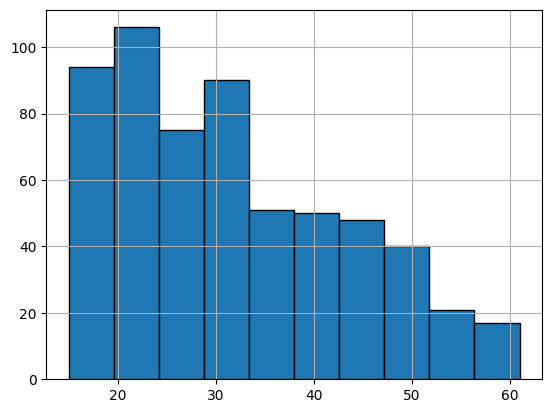

In [79]:
X_train["Age"].hist(edgecolor="black")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

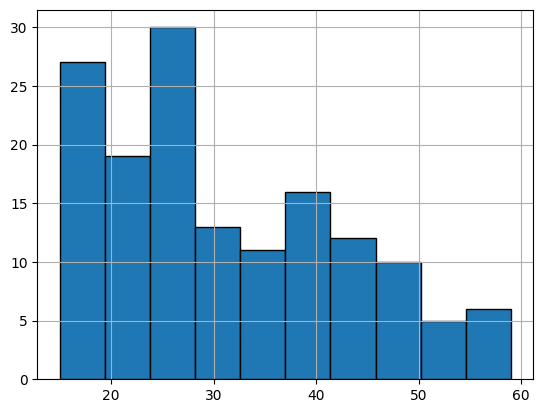

In [80]:
X_test["Age"].hist(edgecolor="black")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

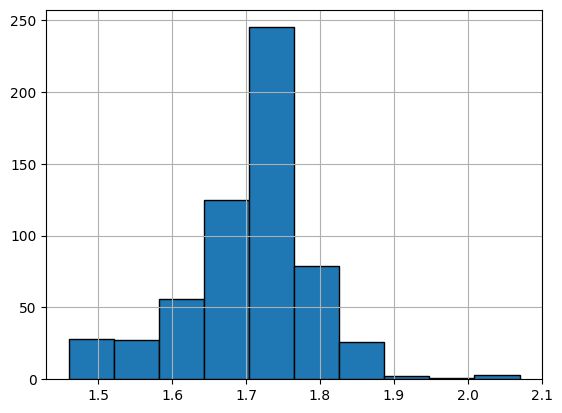

In [81]:
X_train["Height"].hist(edgecolor="black")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

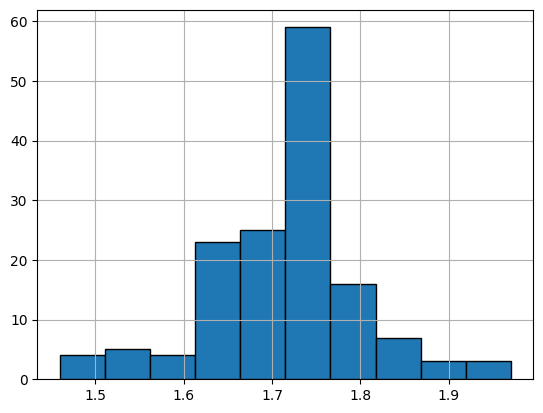

In [82]:
X_test["Height"].hist(edgecolor="black")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

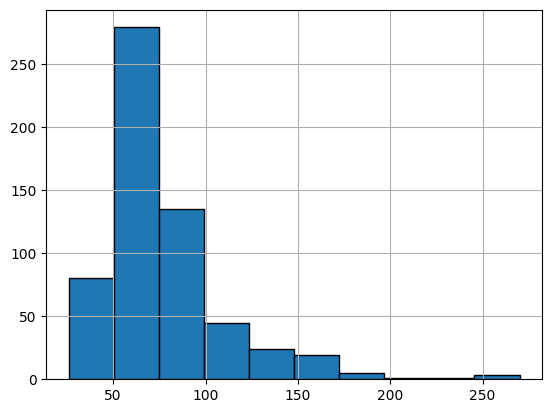

In [83]:
X_train["Weight"].hist(edgecolor="black")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

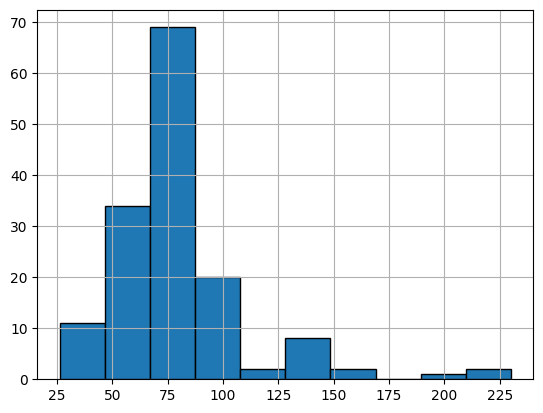

In [84]:
X_test["Weight"].hist(edgecolor="black")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

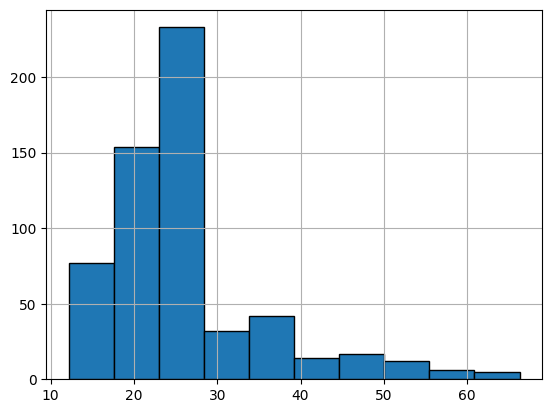

In [85]:
X_train["Bmi"].hist(edgecolor="black")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

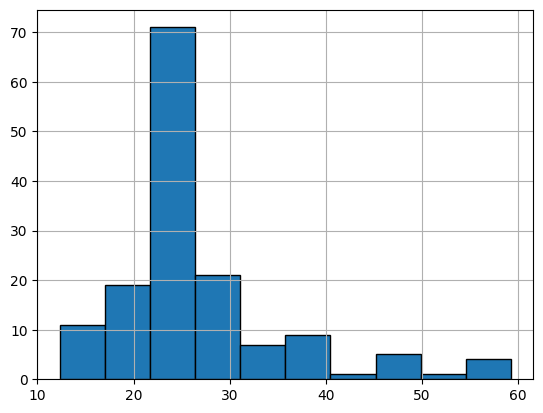

In [86]:
X_test["Bmi"].hist(edgecolor="black")
plt.show

## Modelo predictivo

### 3 Opciones

-Modelo de regresión
-Arbol de decisiones
-Random Forest

## DecisionTreeRegressor

In [87]:
from sklearn.tree import DecisionTreeRegressor

bmidata_model_v2 = DecisionTreeRegressor()

# Entrenamiento del modelo
bmidata_model_v2.fit(X_train, y_train)

# Predicción
y_pred = bmidata_model_v2.predict(X_test)

y_test_list = y_test.tolist()
s=0
print("Prec. real    Prec. estimado   Error absoluto")
for i in range(20):
  r = y_test_list[i]
  e = y_pred[i]
  e_abs = abs(r - e)
  e_p = abs(100 - ((r - e) / r) * 100)
  s = s+e_p

  print (f"{r:10.2f}   {e:12.2f}  {e_abs:16.2f}")

print("precisión es ", s/20)

Prec. real    Prec. estimado   Error absoluto
      1.00           1.00              0.00
      5.00           5.00              0.00
      2.00           2.00              0.00
      1.00           1.00              0.00
      2.00           2.00              0.00
      1.00           1.00              0.00
      1.00           1.00              0.00
      4.00           4.00              0.00
      1.00           1.00              0.00
      4.00           4.00              0.00
      2.00           2.00              0.00
      2.00           2.00              0.00
      2.00           2.00              0.00
      1.00           1.00              0.00
      1.00           1.00              0.00
      1.00           1.00              0.00
      0.00           0.00              0.00
      3.00           3.00              0.00
      1.00           1.00              0.00
      1.00           1.00              0.00
precisión es  nan


In [88]:
from sklearn.metrics import mean_squared_error, r2_score

# Error
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred, squared=False))

# Coeficiente de determinación: 1 es la predicción perfecta.
print("Coeficiente de determinación: ", r2_score(y_test, y_pred))

Error cuadrático medio:  0.0
Coeficiente de determinación:  1.0


## LinearRegression

In [89]:
from sklearn.linear_model import LinearRegression

bmidata_model_v4 = LinearRegression()

# Entrenamiento del modelo
bmidata_model_v4.fit(X_train, y_train)

# Predicción
y_pred = bmidata_model_v4.predict(X_test)

y_test_list = y_test.tolist()

print("Prec. real    Prec. estimado   Error absoluto")
for i in range(20):
  r = y_test_list[i]
  e = y_pred[i]
  e_abs = abs(r - e)
  print(f"{r:10.2f}   {e:12.2f}  {e_abs:16.2f}")

Prec. real    Prec. estimado   Error absoluto
      1.00           1.27              0.27
      5.00           5.60              0.60
      2.00           2.04              0.04
      1.00           1.15              0.15
      2.00           2.10              0.10
      1.00           1.26              0.26
      1.00           1.33              0.33
      4.00           3.12              0.88
      1.00           0.83              0.17
      4.00           3.03              0.97
      2.00           2.15              0.15
      2.00           1.92              0.08
      2.00           1.86              0.14
      1.00           1.23              0.23
      1.00           0.92              0.08
      1.00           1.08              0.08
      0.00           0.10              0.10
      3.00           2.26              0.74
      1.00           0.68              0.32
      1.00           1.34              0.34


In [90]:
# Error
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred, squared=False))

# Coeficiente de determinación: 1 es la predicción perfecta.
print("Coeficiente de determinación: ", r2_score(y_test, y_pred))

Error cuadrático medio:  0.38956447221536955
Coeficiente de determinación:  0.9177071376006505


## RandomForest

In [91]:
from sklearn.ensemble import RandomForestRegressor

bmidata_model_v3 = RandomForestRegressor()

# Entrenamiento del modelo
bmidata_model_v3.fit(X_train, y_train)

# Predicción
y_pred = bmidata_model_v3.predict(X_test)

y_test_list = y_test.tolist()

print("Prec. real    Prec. estimado   Error absoluto")
for i in range(20):
  r = y_test_list[i]
  e = y_pred[i]
  e_abs = abs(r - e)
  e_p = abs(100 - ((r - e) / r) * 100)
  print(f"{r:10.2f}   {e:12.2f}  {e_abs:16.2f}")

Prec. real    Prec. estimado   Error absoluto
      1.00           1.00              0.00
      5.00           5.00              0.00
      2.00           2.00              0.00
      1.00           1.00              0.00
      2.00           2.00              0.00
      1.00           1.00              0.00
      1.00           1.00              0.00
      4.00           3.95              0.05
      1.00           1.00              0.00
      4.00           3.99              0.01
      2.00           2.00              0.00
      2.00           2.00              0.00
      2.00           2.00              0.00
      1.00           1.00              0.00
      1.00           1.00              0.00
      1.00           1.00              0.00
      0.00           0.00              0.00
      3.00           2.92              0.08
      1.00           1.00              0.00
      1.00           1.00              0.00


In [92]:
# Error
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred, squared=False))

# Coeficiente de determinación: 1 es la predicción perfecta.
print("Coeficiente de determinación: ", r2_score(y_test, y_pred))

Error cuadrático medio:  0.04510985844423655
Coeficiente de determinación:  0.9988965658736749


In [93]:
import joblib
joblib.dump(bmidata_model_v2,"entrenamiento_bmi.pkl")

['entrenamiento_bmi.pkl']